In [1]:
import dask.dataframe as dd
import networkx as nx
import numpy as np
import pandas as pd
import torch
from matplotlib import pyplot as plt
from torch_geometric.data import Data
from torch_geometric.utils import to_networkx

from graph_reinforcement_learning_using_blockchain_data import config
import seaborn as sns

config.load_dotenv()

2025-03-30 11:06:27.850 | INFO     | graph_reinforcement_learning_using_blockchain_data.config:<module>:11 - PROJ_ROOT path is: /Users/liamtessendorf/Programming/Uni/2_Master/4_FS25_Programming/graph-reinforcement-learning-using-blockchain-data


True

In [2]:
df = pd.read_csv(config.FLASHBOTS_Q2_DATA_DIR / "features_edges.csv")

In [3]:
df.head()

,transactionHash,blockNumber,gasUsed,cumulativeGasUsed,transactionIndex,effectiveGasPrice,status,fee,from,to,...,dummy_0x9d9af8e3,dummy_0x19b47279,dummy_0x8201aa3f,dummy_0xc42079f9,dummy_0xddf252ad,dummy_0x17307eab,dummy_0xddac4093,dummy_0x8c5be1e5,dummy_0x7fcf532c,label
0,0x8e90ecb85b61af368db0154830453552f0c27e0e1812...,17005294,153529,10750253,111,19150328915,1,2940130847991035,0x832aC338d06f5A438f3340B724c08C44e744e9c2,0x00000000000001ad428e4906aE43D8F9852d0dD6,...,1,0,0,0,1,0,0,1,0,0
1,0xd83c25449d0766a18945f10aff7912f2ff492f0234a8...,16962424,123497,229900,1,139502435999,1,17228132338568503,0x080086911D8c78008800FAE75871a657b77d0082,0x0000E0Ca771e21bD00057F54A68C30D400000000,...,0,0,0,0,1,0,0,0,0,0
2,0x8b434ba680a93cc0e85a7c431e5b35a8efb60ef05c24...,16993741,21000,15838026,183,22098066562,1,464059397802000,0xE991Dc594Ea50b7B83be1B0a44Fd138582c04383,0xD8A5859Ce6f265D376922Dc27f70b804cc65f49E,...,0,0,0,0,0,0,0,0,0,0
3,0x8d3b8e46a66a909643f2bb7497b18c954fc22fa5bd5c...,16972733,46817,14885776,165,18825121161,1,881335697394537,0xCA8ba7d3f798d1872A8C05c5358a1b24a4d3Ac64,0x2b591e99afE9f32eAA6214f7B7629768c40Eeb39,...,0,0,0,0,1,0,0,0,0,0
4,0x25908bad48b2353a1da142da6f0a19c015dfbac5245f...,17028487,32215,3160909,48,19660583885,1,633365709855275,0x8FEf490D614fCe8B93Bd6F28835dD35a8B3229a9,0xBA50933C268F567BDC86E1aC131BE072C6B0b71a,...,0,0,0,0,1,0,0,0,0,0


In [4]:
df_multi_occ = df[df["from"].duplicated(keep=False)]

In [11]:
print(len(df_multi_occ) - len(df))

-71084


In [17]:
counts = df_multi_occ["from"].value_counts().to_list()

print(np.average(counts))
print(np.median(counts))

20.77350765979926
2.0


In [20]:
def plot_hist(df, label_name):
    sns.set(style="whitegrid")

    plt.figure(figsize=(8, 6))
    ax = sns.histplot(df[label_name], bins=2, discrete=True)

    for p in ax.patches:
        ax.annotate(
            f"{int(p.get_height())}",
            (p.get_x() + p.get_width() / 2.0, p.get_height()),
            ha="center",
            va="center",
            xytext=(0, 10),
            textcoords="offset points",
        )

    ax.set_xticks([0, 1])
    ax.set_xlabel("Class Label")
    ax.set_ylabel("Count")
    ax.set_title("Histogram of Class Labels")

    plt.show()

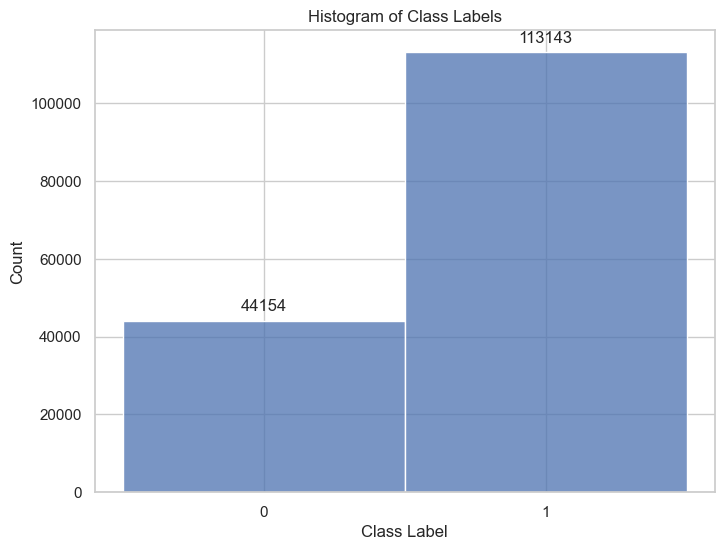

In [21]:
plot_hist(df_multi_occ, "label")

In [22]:
print(df_multi_occ.head())

                                      transactionHash  blockNumber  gasUsed  \
1   0xd83c25449d0766a18945f10aff7912f2ff492f0234a8...     16962424   123497   
4   0x25908bad48b2353a1da142da6f0a19c015dfbac5245f...     17028487    32215   
7   0xe36823a951565b72b19c3792227a64e51fae6d2178f5...     16962424   114160   
10  0xf1a5d34c843b65d87ffaf9822f34308c640bf7520135...     17005310   244212   
12  0x8c7714457f97b28870135eb050acb7c68257543a6cec...     17123671   120928   

    cumulativeGasUsed  transactionIndex  effectiveGasPrice  status  \
1              229900                 1       139502435999       1   
4             3160909                48        19660583885       1   
7             5077631                55        23145646086       1   
10             381235                 1        18110703409       1   
12            1551639                 3        39064213478       1   

                  fee                                        from  \
1   17228132338568503  0x080086911D

In [24]:
df_multi_occ.to_csv(config.FLASHBOTS_Q2_DATA_DIR / "features_edges_multiocc.csv", index=False)